PYTHON ASSESSMENT

#Prepare data and work space

##Importing and Selecting the kaggle.json file

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nganono","key":"8a54d67045ddc0eaf34939925391c4e9"}'}

##Move the uploaded json file to right directory


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

##Downloading dataset

In [ ]:
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
License(s): unknown
  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 17.9MB/s]


##Unzipping the dataset

In [ ]:
!unzip loan-prediction-problem-dataset.zip

Archive:  loan-prediction-problem-dataset.zip
  inflating: test_Y3wMUE5_7gLdaTN.csv  
  inflating: train_u6lujuX_CVtuZ9i.csv  


##Combine and upload data to the work space

In [ ]:
import pandas as pd
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
df=pd.concat([train,test])


In [ ]:
df.shape

(981, 13)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


#Assessment 1

##What is the average Loan Amount?


In [ ]:
average_of_loan_amount=df["LoanAmount"].mean()
print(f"The average of loan amount is {average_of_loan_amount:.2f}")


NameError: name 'df' is not defined

##2. How many loans were approved?

In [ ]:
loan_approved=df[df["Loan_Status"]=="Y"]["Loan_Status"].count()
print(f"{loan_approved} loans were approved.")

422 loans were approved.


##3. What is the distribution of Property Area?

In [ ]:
property_area_distribution=df["Property_Area"].value_counts()
print(property_area_distribution)

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64


<Axes: title={'center': 'Property Area Distribution'}, xlabel='Property Area', ylabel='Number of Properties'>

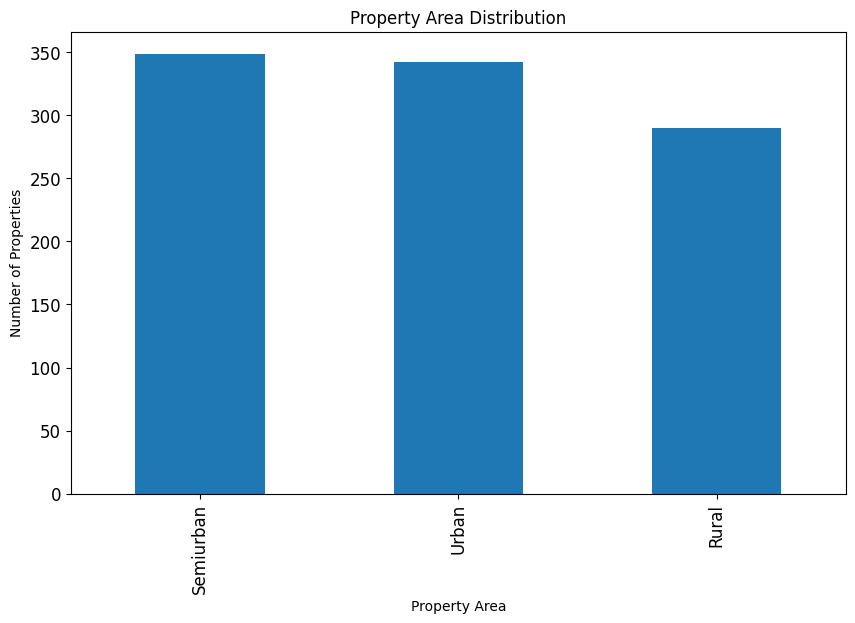

In [ ]:
property_area_distribution.plot(kind='bar', figsize=(10, 6), fontsize=12, title="Property Area Distribution", xlabel="Property Area", ylabel="Number of Properties")

##4. What is the average Applicant Income for graduates?

In [ ]:
average_applicant_income_for_graduates=df[df["Education"]=="Graduate"]["ApplicantIncome"].mean()
print(f"Average applicant income for graduates {average_applicant_income_for_graduates:.2f}")


Average applicant income for graduates 5602.44


##5. Fill missing Loan Amount with the mean Loan Amount and show the updated DataFrame.

In [ ]:
df["LoanAmount"]=df["LoanAmount"].fillna(average_of_loan_amount)
print(df)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0   142.51153             360.0   
1

##6. What is the percentage of loans approved for self-employed applicants?


In [ ]:
#Total approved loan for self employed applicants
approved_for_self_employed= len(df[(df["Self_Employed"]=="Yes")&(df["Loan_Status"]=="Y")])

#Total self-employed applicants
self_employed=df[df["Self_Employed"]=="Yes"]["Self_Employed"].count()

#Percentage of loans approved for self-employed applicants
percentage_of_loans_approved_for_self_employed=(approved_for_self_employed/self_employed)*100
print(f"Percentage of loans approved for self-employed applicants is {percentage_of_loans_approved_for_self_employed:.2f}%.")

Percentage of loans approved for self-employed applicants is 47.06%.


##7. How many applicants have a credit history

In [ ]:
applicants_with_credit_history=df[df["Credit_History"].notnull()==True]["Credit_History"].count()
print(f"{applicants_with_credit_history} applicants have a credit history.")

902 applicants have a credit history.


##8. What is the most common Property Area among applicants with no dependents?

In [ ]:
Property_Area_with_applicants_without_dependents= df[df["Dependents"]=='0']["Property_Area"].mode()[0]
print(f"The most common Property Area among applicants with no dependents {Property_Area_with_applicants_without_dependents}.")

The most common Property Area among applicants with no dependents Semiurban.


#Assessment 2

##1. What is the average Co Applicant Income for applicants who are not graduates?

In [ ]:
average_CoApplicant_Income_for_not_graduates= df[df["Education"]=="Not Graduate"]['CoapplicantIncome'].mean()
print(f"The average Co Applicant Income for applicants who are not graduates is {average_CoApplicant_Income_for_not_graduates:.2f}")

The average Co Applicant Income for applicants who are not graduates is 1294.96


##2. How many applicants are self-employed?

In [ ]:
self_employed=df[df["Self_Employed"]=="Yes"]["Self_Employed"].count()
print(f"Applicants who are self-employed are {self_employed}.")

Applicants who are self-employed are 119.


##3. What is the maximum Loan Amount?


In [ ]:
maximum_loan_amount=df["LoanAmount"].max()
print(f"The maximum loan amount is {maximum_loan_amount}")

The maximum loan amount is 700.0


##4. What is the most common Property Area among applicants with no dependents?

In [ ]:
Property_Area_with_applicants_without_dependents= df[df["Dependents"]=='0']["Property_Area"].mode()[0]
print(f"The most common Property Area among applicants with no dependents {Property_Area_with_applicants_without_dependents}.")

The most common Property Area among applicants with no dependents Semiurban.


##5. What is the total Applicant Income for each Property Area?

In [ ]:
total_applicant_income_for_property_area=df.groupby("Property_Area")["ApplicantIncome"].sum()
print(total_applicant_income_for_property_area)

Property_Area
Rural        1501888
Semiurban    1783597
Urban        1795894
Name: ApplicantIncome, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

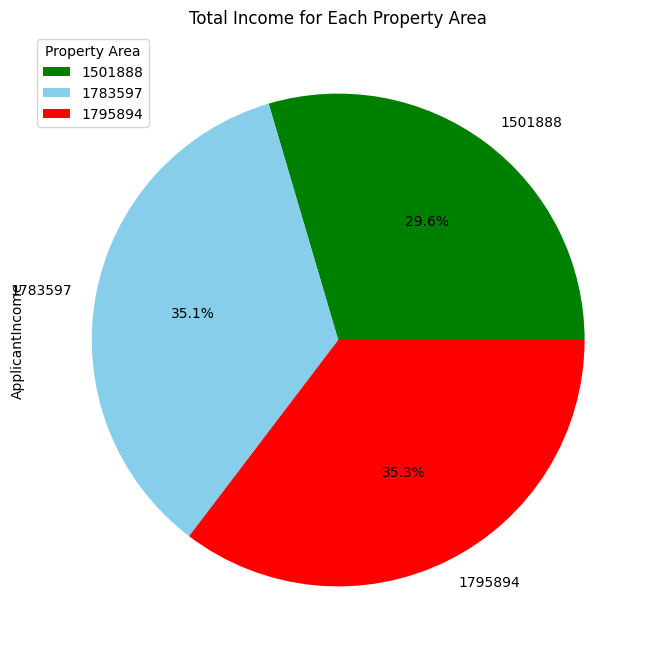

In [ ]:
import matplotlib.pyplot as plt

#total_applicant_income_for_property_area.plot(kind='bar', figsize=(5, 6), fontsize=12, title="Total Income for Each Property Area", xlabel="Property Area", ylabel="Total Income")
plt.figure(figsize=(8,8))
total_applicant_income_for_property_area.plot(kind="pie",title="Total Income for Each Property Area",labels=total_applicant_income_for_property_area, autopct="%1.1f%%", colors=["green", "skyblue", "red"])
plt.legend(title="Property Area", loc="upper left")
plt.show()

## 6.What is the average Loan Amount for applicants with a credit history

In [ ]:
average_loan_amount_for_applicants_with_credit_history=df[df["Credit_History"].notnull()==True]["LoanAmount"].mean()
print(f"The average Loan Amount for applicants with a credit history is {average_loan_amount_for_applicants_with_credit_history:.2f}")

The average Loan Amount for applicants with a credit history is 141.81
